In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load fire incident data
fire_data = pd.read_csv('8d76ac6b-5ae8-4428-82a4-043130d17b02.csv')


In [3]:
# Define severity levels
severity_levels = {
    'High Severity': [
        'Building fire', 'Passenger vehicle fire', 'Mobile property (vehicle) fire, Other',
        'Off-road vehicle or heavy equipment fire', 'Commercial Compactor fire, confined to rubbish',
        'Self-propelled motor home or recreational vehicle', 'Road freight or transport vehicle fire',
        'Rail vehicle fire', 'Water vehicle fire', 'Fire in portable building, fixed location',
        'Fire in mobile prop used as a fixed struc, Other', 'Fire in motor home, camper, recreational vehicle',
        'Camper or recreational vehicle (RV) fire'
    ],
    'Moderate Severity': [
        'Outside rubbish fire, Other', 'Outside rubbish, trash or waste fire',
        'Brush or brush-and-grass mixture fire', 'Special outside fire, Other',
        'Fires in structure other than in a building', 'Outside equipment fire',
        'Garbage dump or sanitary landfill fire', 'Dumpster or other outside trash receptacle fire',
        'Grass fire', 'Outside storage fire', 'Construction or demolition landfill fire',
        'Forest, woods or wildland fire', 'Outside gas or vapor combustion explosion',
        'Outside stationary compactor/compacted trash fire', 'Cultivated trees or nursery stock fire',
        'Cultivated grain or crop fire', 'Cultivated vegetation, crop fire, Other',
        'Structure fire, Other (conversion only)'
    ],
    'Low Severity': [
        'Cooking fire, confined to container', 'Trash or rubbish fire, contained',
        'Fuel burner/boiler malfunction, fire confined', 'Chimney or flue fire, confined to chimney or flue',
        'Natural vegetation fire, Other', 'Incinerator overload or malfunction, fire confined',
        'Outside mailbox fire'
    ]
}

# Function to assign severity based on type description
def assign_severity(description):
    for level, types in severity_levels.items():
        if description in types:
            return level
    return 'Unknown'

# Apply severity level mapping
fire_data['Severity Level'] = fire_data['type_description'].apply(assign_severity)


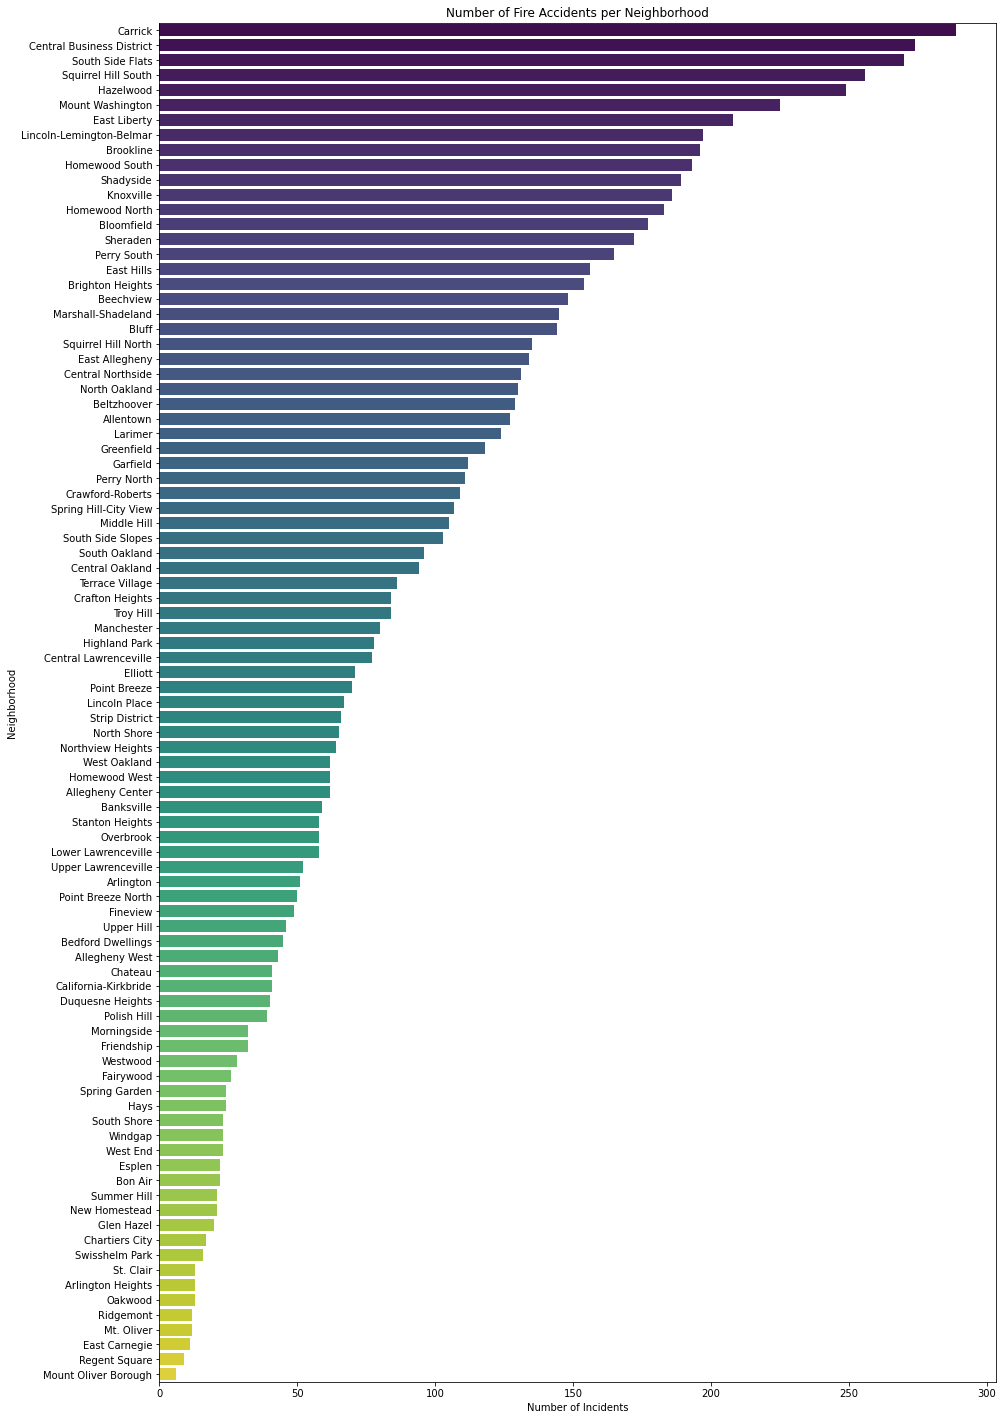

In [4]:
# Plotting the number of fire incidents per neighborhood
incidents_per_neighborhood = fire_data['neighborhood'].value_counts().reset_index()
incidents_per_neighborhood.columns = ['Neighborhood', 'Number of Incidents']
plt.figure(figsize=(15, 25))
sns.barplot(data=incidents_per_neighborhood, y='Neighborhood', x='Number of Incidents', palette='viridis')
plt.title('Number of Fire Accidents per Neighborhood')
plt.xlabel('Number of Incidents')
plt.ylabel('Neighborhood')
plt.show()


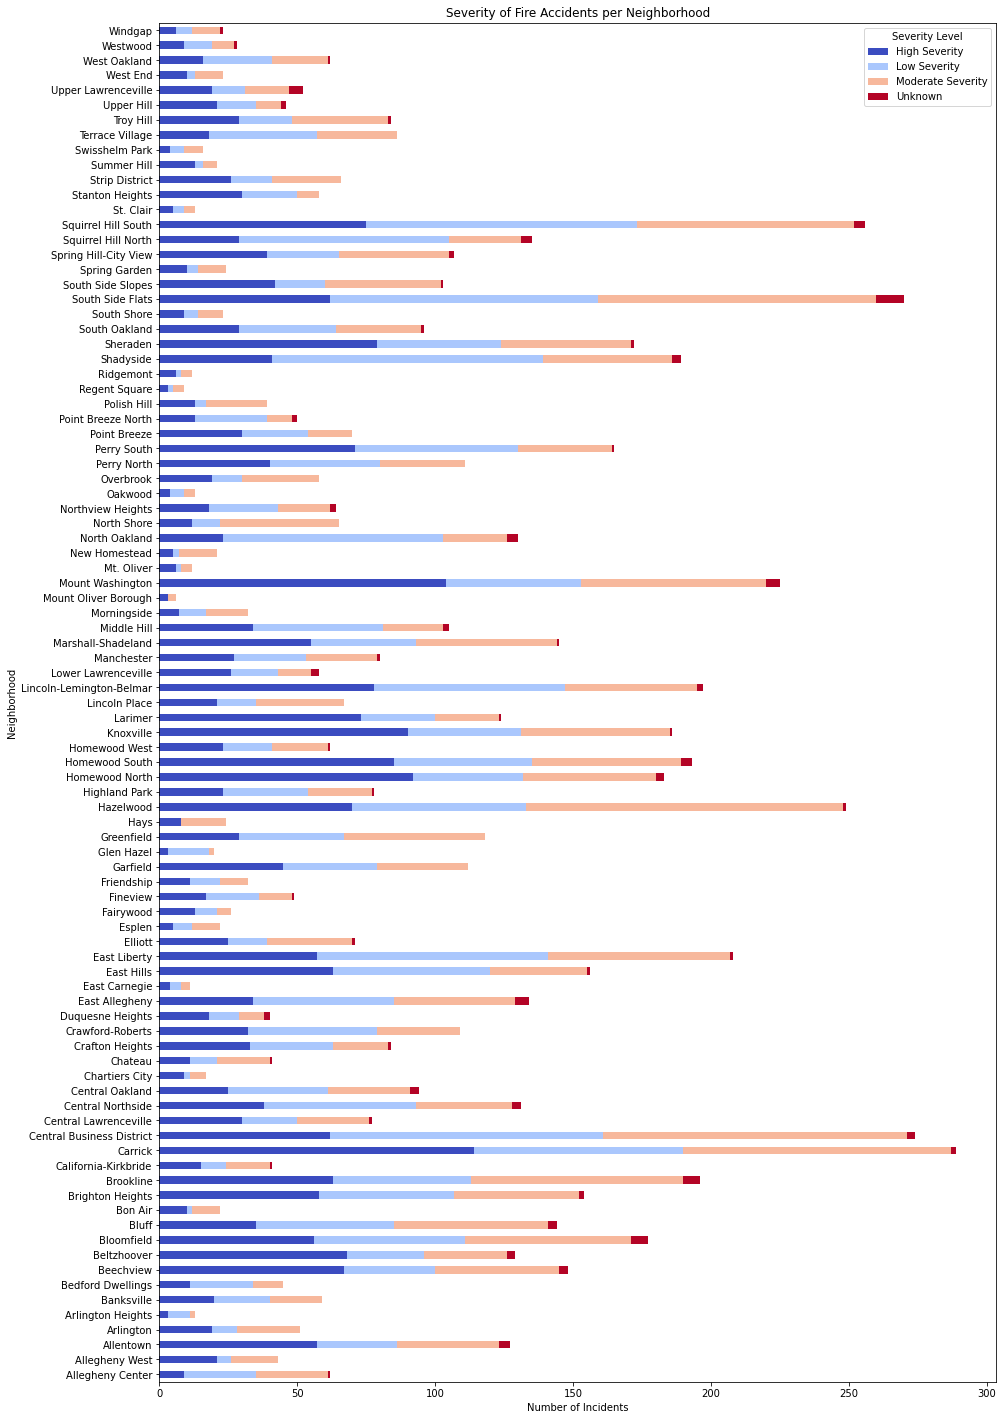

In [6]:
# Plotting the severity distribution
severity_distribution = fire_data.groupby(['neighborhood', 'Severity Level']).size().unstack(fill_value=0)
severity_distribution.plot(kind='barh', stacked=True, figsize=(15,25), colormap='coolwarm')
plt.title('Severity of Fire Accidents per Neighborhood')
plt.xlabel('Number of Incidents')
plt.ylabel('Neighborhood')
plt.show()


In [24]:

# Calculate the most common fire accident month in each neighborhood
fire_data['Month'] = pd.to_datetime(fire_data['alarm_time']).dt.month  # Extracting month from the alarm_time column
common_month_neighborhood = fire_data.groupby('neighborhood')['Month'].agg(lambda x: x.mode()[0] if not x.empty else None).reset_index()
common_month_neighborhood.columns = ['Neighborhood', 'Most Common Month']

# Display the most common fire accident month for each neighborhood
print(common_month_neighborhood)

           Neighborhood  Most Common Month
0      Allegheny Center                5.0
1        Allegheny West                7.0
2             Allentown                9.0
3             Arlington                5.0
4     Arlington Heights                2.0
..                  ...                ...
86  Upper Lawrenceville                3.0
87             West End                8.0
88         West Oakland                1.0
89             Westwood                9.0
90              Windgap                5.0

[91 rows x 2 columns]


In [25]:
# Identify and list recurring fire accidents at specific addresses
recurring_fire_locations = fire_data['address'].value_counts()
recurring_fire_locations = recurring_fire_locations[recurring_fire_locations > 1].reset_index()
recurring_fire_locations.columns = ['Address', 'Occurrences']

# Display addresses with recurring fire incidents
print(recurring_fire_locations.head(10))

                                           Address  Occurrences
0         700 BLOCK MERCER ST, PITTSBURGH PA 15219           25
1       600 BLOCK PRESSLEY ST, PITTSBURGH PA 15212           23
2     2100 BLOCK PARK HILL DR, PITTSBURGH PA 15221           20
3        900 BLOCK ROSELLE CT, PITTSBURGH PA 15207           19
4           900 BLOCK 2ND AVE, PITTSBURGH PA 15219           17
5         200 BLOCK E OHIO ST, PITTSBURGH PA 15212           17
6         2400 BLOCK SARAH ST, PITTSBURGH PA 15203           17
7       100 BLOCK TECUMSEH ST, PITTSBURGH PA 15207           17
8  800 BLOCK E WARRINGTON AVE, PITTSBURGH PA 15210           16
9     1000 BLOCK SHEFFIELD ST, PITTSBURGH PA 15233           13
